In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/heart.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None,
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  )

Exploratory Data Analysis (EDA)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Replace this with your actual dataset)
df = pd.read_csv("/content/drive/MyDrive/heart.csv")  # Ensure you have a valid dataset

# Set style for better visualization
sns.set_style("whitegrid")

# Summary statistics
summary_stats = df.describe()





summary_stats



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Linear Regression from Scratch:

In [ ]:
import numpy as np

# Prepare data for regression (predicting target variable)
X = df.drop(columns=["target"]).values  # Features
y = df["target"].values  # Target

# Standardize features for better numerical stability
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add intercept term (column of ones) for bias
X = np.c_[np.ones(X.shape[0]), X]

# Initialize weights (coefficients)
theta = np.zeros(X.shape[1])

# Implement Gradient Descent for Linear Regression
def compute_cost(X, y, theta):
    """Compute cost function for linear regression."""
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    """Perform gradient descent to learn theta."""
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradients = (1 / m) * (X.T @ (X @ theta - y))
        theta -= alpha * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Set hyperparameters
alpha = 0.01  # Learning rate
iterations = 1000

# Train model
theta_optimal, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Final cost
final_cost = compute_cost(X, y, theta_optimal)

theta_optimal, final_cost


(array([ 0.54453095, -0.00764735, -0.09112856,  0.11607096, -0.0347328 ,
        -0.01819614,  0.00617434,  0.02619156,  0.06882411, -0.06773727,
        -0.06827303,  0.04850662, -0.10267045, -0.07276854]),
 0.05982743845910252)

Two models

MSE for Model 1 (Linear Regression): 0.11627071992880016
MSE for Model 2 (Ridge Regression): 0.11593229298149349
R-squared for Model 1 (Linear Regression): 0.5337894947682486
R-squared for Model 2 (Ridge Regression): 0.5351464847153693


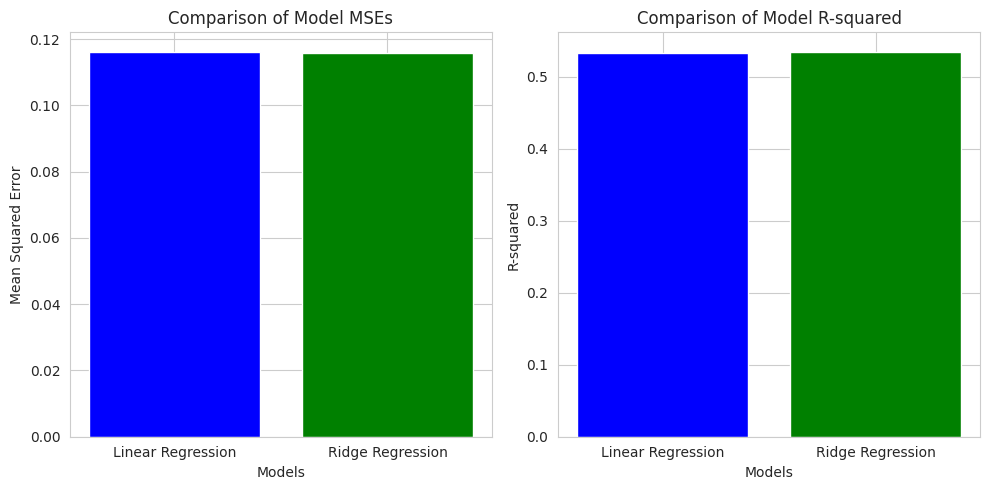

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score # Import r2_score
import pandas as pd # Import pandas to make 'df' accessible

# Load dataset (Replace this with your actual dataset)
df = pd.read_csv("/content/drive/MyDrive/heart.csv")  # Ensure you have a valid dataset

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["target"]), df["target"], test_size=0.2, random_state=42)

# Model 1: Simple Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1) # Calculate R-squared for Model 1


# Model 2: Ridge Regression (Regularized)
model2 = Ridge(alpha=1.0)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2) # Calculate R-squared for Model 2

print("MSE for Model 1 (Linear Regression):", mse1)
print("MSE for Model 2 (Ridge Regression):", mse2)
print("R-squared for Model 1 (Linear Regression):", r2_1) # Print R-squared for Model 1
print("R-squared for Model 2 (Ridge Regression):", r2_2) # Print R-squared for Model 2


# Plot Bar Graph for MSE
models = ['Linear Regression', 'Ridge Regression']
mses = [mse1, mse2]

plt.figure(figsize=(10, 5)) # Adjust figure size for better layout

plt.subplot(1, 2, 1) # Create subplot for MSE
plt.bar(models, mses, color=['blue', 'green'])
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("Comparison of Model MSEs")

# Plot Bar Graph for R-squared
r2_values = [r2_1, r2_2]

plt.subplot(1, 2, 2) # Create subplot for R-squared
plt.bar(models, r2_values, color=['blue', 'green'])
plt.xlabel("Models")
plt.ylabel("R-squared")
plt.title("Comparison of Model R-squared")

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

Hyperparameter Optimization with Cross-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Ridge Regression
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100]}

# Cross-validation for Model 2 (Ridge Regression)
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

print("Best Ridge Hyperparameter:", ridge_cv.best_params_)


Best Ridge Hyperparameter: {'alpha': 10}


Feature Selection

In [ ]:
from sklearn.feature_selection import RFE

# Apply RFE on Model 1 (Linear Regression)
rfe1 = RFE(model1, n_features_to_select=5)
rfe1.fit(X_train, y_train)
selected_features_model1 = X_train.columns[rfe1.support_]

# Apply RFE on Model 2 (Ridge Regression)
rfe2 = RFE(model2, n_features_to_select=5)
rfe2.fit(X_train, y_train)
selected_features_model2 = X_train.columns[rfe2.support_]

print("Best Features for Model 1:", selected_features_model1)
print("Best Features for Model 2:", selected_features_model2)


Best Features for Model 1: Index(['sex', 'exang', 'slope', 'ca', 'thal'], dtype='object')
Best Features for Model 2: Index(['sex', 'exang', 'slope', 'ca', 'thal'], dtype='object')


Final Model

MSE for Model 1 (Linear Regression): 0.11627071992880016
MSE for Model 2 (Ridge Regression): 0.11593229298149349
MSE for Final Model (Ridge with Optimization): 0.1487382727496152
R-squared for Model 1 (Linear Regression): 0.5337894947682486
R-squared for Model 2 (Ridge Regression): 0.5351464847153693
R-squared for Final Model (Ridge with Optimization): 0.40360440420116583


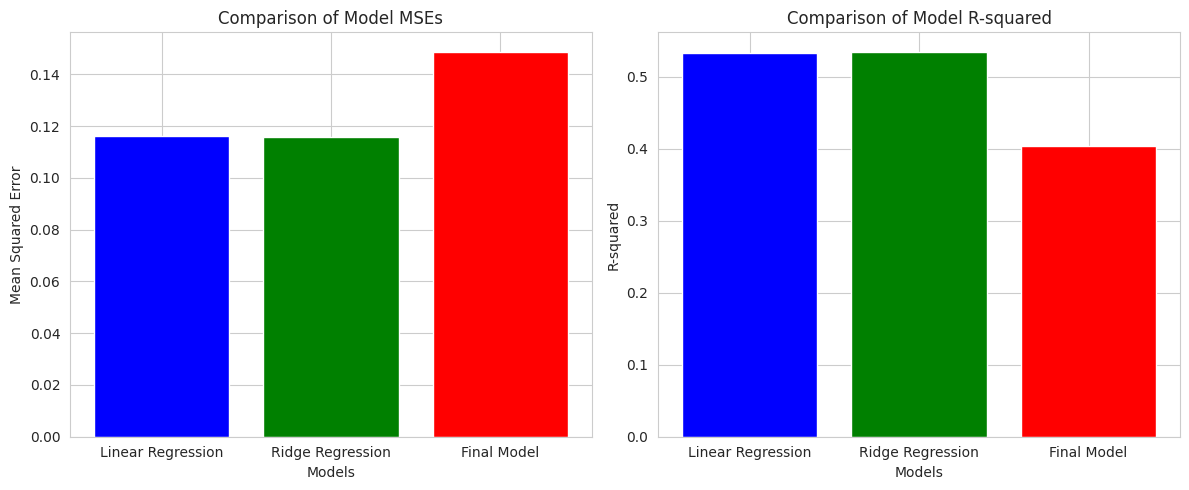

In [10]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/heart.csv")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["target"]), df["target"], test_size=0.2, random_state=42
)

# Model 1: Simple Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

# Model 2: Ridge Regression (Regularized)
model2 = Ridge(alpha=1.0)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

# Hyperparameter Optimization with Cross-Validation for Ridge Regression
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring="neg_mean_squared_error")
ridge_cv.fit(X_train, y_train)

# Feature Selection using RFE on Ridge Regression
rfe2 = RFE(model2, n_features_to_select=5)
rfe2.fit(X_train, y_train)
selected_features_model2 = X_train.columns[rfe2.support_]

# Final Model: Ridge Regression with optimized hyperparameters and selected features
X_train_best = X_train[selected_features_model2]
X_test_best = X_test[selected_features_model2]
final_model = Ridge(alpha=ridge_cv.best_params_["alpha"])
final_model.fit(X_train_best, y_train)
final_predictions = final_model.predict(X_test_best)
final_mse = mean_squared_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)

# Print and Plot Results
print("MSE for Model 1 (Linear Regression):", mse1)
print("MSE for Model 2 (Ridge Regression):", mse2)
print("MSE for Final Model (Ridge with Optimization):", final_mse)
print("R-squared for Model 1 (Linear Regression):", r2_1)
print("R-squared for Model 2 (Ridge Regression):", r2_2)
print("R-squared for Final Model (Ridge with Optimization):", final_r2)

models = ["Linear Regression", "Ridge Regression", "Final Model"]
mses = [mse1, mse2, final_mse]
r2_values = [r2_1, r2_2, final_r2]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(models, mses, color=["blue", "green", "red"])
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("Comparison of Model MSEs")

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=["blue", "green", "red"])
plt.xlabel("Models")
plt.ylabel("R-squared")
plt.title("Comparison of Model R-squared")

plt.tight_layout()
plt.show()